<a href="https://colab.research.google.com/github/sdazz56/Data-Science-Projects/blob/main/IPL_Analysis_(till_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
matches=pd.read_csv("/content/IPL Matches 2008-2020.csv")
players=pd.read_csv("/content/batsman_and_catches_data.csv")

In [101]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [102]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [103]:
matches=matches.drop(['method'],axis=1)

In [104]:
matches.isna().sum()

id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
eliminator          4
umpire1             0
umpire2             0
dtype: int64

In [105]:
matches=matches.dropna(how='any')
matches.result_margin = matches.result_margin.astype(int)
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               786 non-null    int64 
 1   city             786 non-null    object
 2   date             786 non-null    object
 3   player_of_match  786 non-null    object
 4   venue            786 non-null    object
 5   neutral_venue    786 non-null    int64 
 6   team1            786 non-null    object
 7   team2            786 non-null    object
 8   toss_winner      786 non-null    object
 9   toss_decision    786 non-null    object
 10  winner           786 non-null    object
 11  result           786 non-null    object
 12  result_margin    786 non-null    int64 
 13  eliminator       786 non-null    object
 14  umpire1          786 non-null    object
 15  umpire2          786 non-null    object
dtypes: int64(3), object(13)
memory usage: 104.4+ KB


In [106]:
matches=matches.drop(['id'],axis=1)
matches[["day", "month", "year"]] = matches["date"].str.split("-", expand = True)

In [107]:
matches=matches.drop(['date'],axis=1  )
matches.head()

,city,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,day,month,year
0,Bangalore,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140,N,Asad Rauf,RE Koertzen,2008,04,18
1,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33,N,MR Benson,SL Shastri,2008,04,19
2,Delhi,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9,N,Aleem Dar,GA Pratapkumar,2008,04,19
3,Mumbai,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5,N,SJ Davis,DJ Harper,2008,04,20
4,Kolkata,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5,N,BF Bowden,K Hariharan,2008,04,20


In [108]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   batsman  77 non-null     object
 1   catches  77 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


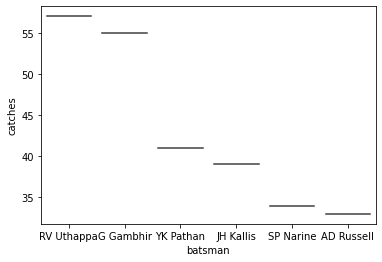

In [109]:
sns.violinplot(
     x="batsman",y="catches",
    data=players.nlargest(6, 'catches')
)

In [110]:
#Renaming the columns returned by value_counts
top_player_of_match_awards = matches['player_of_match'].value_counts().rename_axis('names').reset_index(name='counts')
top_player_of_match_awards.head()

,names,counts
0,AB de Villiers,22
1,CH Gayle,22
2,RG Sharma,18
3,MS Dhoni,17
4,DA Warner,17


<BarContainer object of 10 artists>

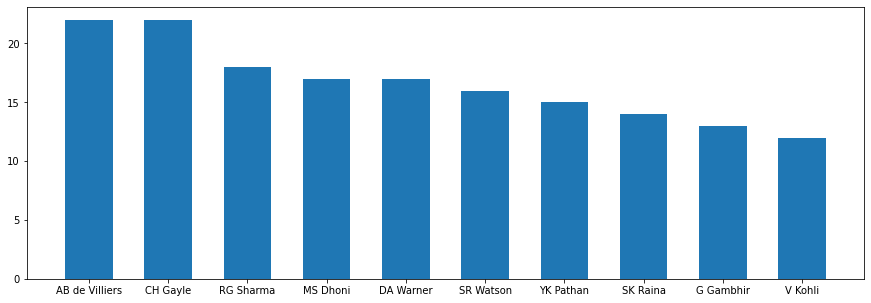

In [111]:
plt.figure(figsize=(15,5))
plt.bar(top_player_of_match_awards['names'].head(10),top_player_of_match_awards['counts'].head(10),width=0.6)

In [112]:
#Renaming the columns returned by value_counts for matches won
most_winning_matches = matches['winner'].value_counts().rename_axis('names').reset_index(name='counts')
most_winning_matches['names'][1]
#Renaming the columns returned by value_counts for toss won
most_tosses_won = matches['toss_winner'].value_counts().rename_axis('names').reset_index(name='counts')
most_tosses_won['names'][0]

'Mumbai Indians'

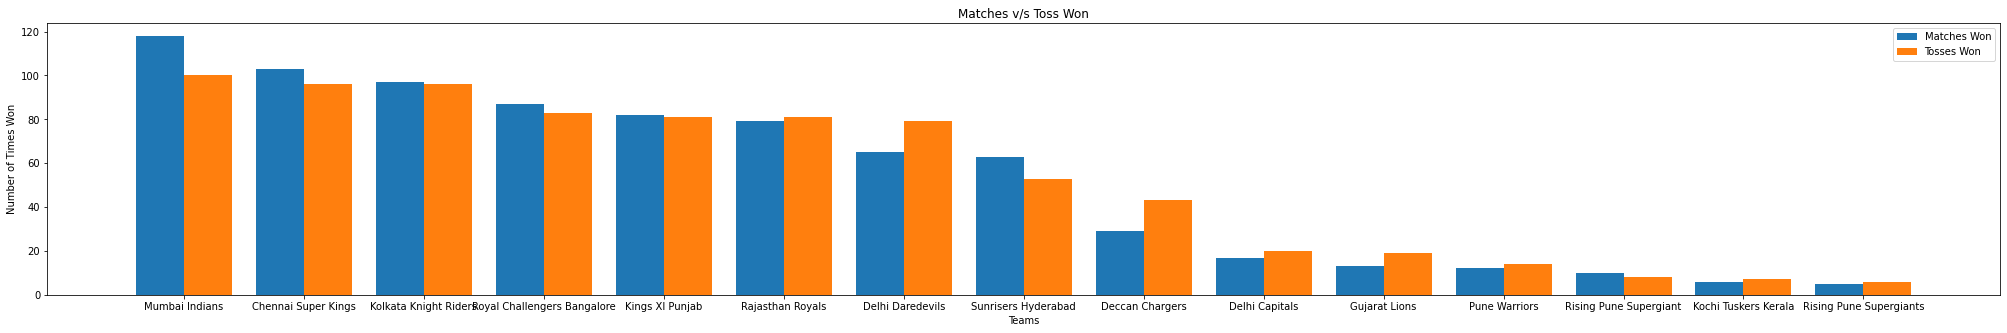

In [113]:
plt.figure(figsize=(35,5))

X_axis = np.arange(len(most_winning_matches['names']))
  
plt.bar(X_axis - 0.2, most_winning_matches['counts'], 0.4, label = 'Matches Won')
plt.bar(X_axis + 0.2, most_tosses_won['counts'], 0.4, label = 'Tosses Won')
  
plt.xticks(X_axis, most_winning_matches['names'])
plt.xlabel("Teams")
plt.ylabel("Number of Times Won")
plt.title("Matches v/s Toss Won")
plt.legend()
plt.show()